In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

In [3]:
df = pd.read_hdf("singlepi_e100GeV_pu200_oct27.h5")

In [4]:
updated_df_groupby_avg=df.groupby(['event','trackster','layer']).mean().reset_index()
updated_df_groupby_max=df.groupby(['event','trackster','layer']).max().reset_index()
updated_df_groupby_min=df.groupby(['event','trackster','layer']).min().reset_index()
updated_df_groupby_sum=df.groupby(['event','trackster','layer']).sum().reset_index()

In [6]:
def getValueEventLayerTrackster(df, col, event, trackster,layer, defaultV = 0):
    s = df.loc[(df['event'] == event) & (df['layer'] ==layer) & (df['trackster'] ==trackster) ,col ]
    return defaultV if s.size == 0 else s.values[0]

In [7]:
updated_df = df.copy()
#updated_df['prevAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'] - 1, row['trckEta']), axis=1)
#updated_df['prevAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'] - 1,row['trckPhi']), axis=1)
#updated_df['prevAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] - 1), axis=1)
#updated_df['PrevSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] - 1), axis=1)

#updated_df['NextAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'] + 1,row['trckEta']), axis=1)
#updated_df['NextAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'] + 1,row['trckPhi']), axis=1)
#updated_df['NextAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] + 1), axis=1)
#updated_df['NextSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] + 1), axis=1)

#updated_df['SiblingAvgEta'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'eta', row['event'], row['trackster'], row['layer'],row['trckEta'] ), axis=1)
#updated_df['SiblingAvgPhi'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'phi', row['event'], row['trackster'], row['layer'],row['trckPhi'] ), axis=1)
#updated_df['SiblingAvgE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_avg, 'E', row['event'], row['trackster'], row['layer'] ), axis=1)
#updated_df['SiblingSumE'] = updated_df.apply(lambda row: getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] ), axis=1)

updated_df['RatioSiblingNHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] ), axis=1)
updated_df['RatioNextNHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] + 1, 1 ), axis=1)
updated_df['RatioPrevNHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] - 1, 1 ), axis=1)

updated_df['RatioE'] = updated_df.apply(lambda row: row['E'] / row['trckEn'], axis=1)
updated_df['RatioSiblingE'] = updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer']), axis=1)
updated_df['RatioNextE'] = updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] + 1,row['trckEn']), axis=1)
updated_df['RatioPrevE'] =  updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] - 1, row['trckEn']), axis=1)

# 2 layers Next. 2 layers Prev
updated_df['RatioNext2E'] = updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] + 2,row['trckEn']), axis=1)
updated_df['RatioPrev2E'] =  updated_df.apply(lambda row: row['E'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'E', row['event'], row['trackster'], row['layer'] - 2, row['trckEn']), axis=1)
updated_df['RatioNext2NHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] + 2, 1 ), axis=1)
updated_df['RatioPrev2NHits'] = updated_df.apply(lambda row: row['nHits'] / getValueEventLayerTrackster(updated_df_groupby_sum, 'nHits', row['event'], row['trackster'], row['layer'] - 2, 1 ), axis=1)

updated_df.head()

,event,trackster,purity,layer,E,eta,phi,x,y,z,...,RatioNextNHits,RatioPrevNHits,RatioE,RatioSiblingE,RatioNextE,RatioPrevE,RatioNext2E,RatioPrev2E,RatioNext2NHits,RatioPrev2NHits
0,1.0,0.0,0.0,1.0,0.077115,1.963233,0.158004,91.118462,14.518062,322.102753,...,0.128205,5.0,0.001335,0.133108,0.049770,0.001335,0.021735,0.001335,0.078125,5.0
1,1.0,0.0,0.0,1.0,0.134952,1.931620,0.233432,92.770134,22.057596,322.102753,...,0.179487,7.0,0.002336,0.232939,0.087097,0.002336,0.038037,0.002336,0.109375,7.0
2,1.0,0.0,0.0,1.0,0.081363,1.932140,0.148012,94.262695,14.054753,322.102753,...,0.051282,2.0,0.001409,0.140440,0.052511,0.001409,0.022933,0.001409,0.031250,2.0
3,1.0,0.0,0.0,1.0,0.023200,1.950308,0.361422,87.475647,33.068218,322.102753,...,0.051282,2.0,0.000402,0.040045,0.014973,0.000402,0.006539,0.000402,0.031250,2.0
4,1.0,0.0,0.0,1.0,0.088878,1.911650,0.356526,91.242096,33.982418,322.102753,...,0.051282,2.0,0.001539,0.153412,0.057362,0.001539,0.025051,0.001539,0.031250,2.0


In [8]:
corr1= updated_df.drop(['trckType'],1,inplace=False).corr()
corr1.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,event,trackster,purity,layer,E,eta,phi,x,y,z,nHits,trckEn,trckEta,trckPhi,RatioSiblingNHits,RatioNextNHits,RatioPrevNHits,RatioE,RatioSiblingE,RatioNextE,RatioPrevE,RatioNext2E,RatioPrev2E,RatioNext2NHits,RatioPrev2NHits
event,1,0.04,0.0085,0.0049,0.013,0.048,0.37,-0.16,0.36,0.011,0.012,-0.12,0.037,0.4,0.0046,-0.004,0.0028,-0.0017,0.004,0.0029,-0.0023,0.0027,0.002,0.0055,0.0026
trackster,0.04,1,0.051,-0.11,-0.0042,-0.058,-0.065,-0.068,-0.064,-0.087,0.026,-0.54,-0.021,-0.078,0.23,0.19,0.13,0.31,0.2,0.073,0.098,0.056,0.031,0.22,0.13
purity,0.0085,0.051,1,0.56,0.35,-0.29,0.0083,0.47,0.011,0.52,0.35,-0.1,-0.17,-0.013,0.45,0.24,0.092,0.22,0.46,0.14,0.16,0.13,0.074,0.26,0.061
layer,0.0049,-0.11,0.56,1,0.28,0.016,0.015,0.39,0.017,0.92,0.13,0.12,-0.023,0.011,0.42,0.21,-0.034,0.026,0.36,0.1,0.095,0.091,0.047,0.21,-0.11
E,0.013,-0.0042,0.35,0.28,1,-0.088,0.021,0.19,0.025,0.27,0.68,0.012,-0.065,0.016,0.46,0.2,0.15,0.35,0.54,0.21,0.28,0.25,0.22,0.22,0.21
eta,0.048,-0.058,-0.29,0.016,-0.088,1,0.015,-0.81,0.014,-0.028,-0.067,0.31,0.53,0.056,-0.17,-0.086,-0.064,-0.096,-0.17,-0.047,-0.055,-0.042,-0.023,-0.092,-0.064
phi,0.37,-0.065,0.0083,0.015,0.021,0.015,1,-0.12,0.99,0.0039,0.019,-0.0046,0.049,0.95,0.014,-0.00083,0.0094,-0.024,0.014,0.0027,0.0033,0.003,0.01,0.0022,0.0039
x,-0.16,-0.068,0.47,0.39,0.19,-0.81,-0.12,1,-0.12,0.46,0.1,-0.11,-0.5,-0.15,0.32,0.17,0.06,0.085,0.3,0.083,0.083,0.077,0.036,0.17,0.032
y,0.36,-0.064,0.011,0.017,0.025,0.014,0.99,-0.12,1,0.0028,0.022,-0.003,0.05,0.94,0.018,0.0021,0.011,-0.024,0.018,0.004,0.0051,0.004,0.012,0.0054,0.0046
z,0.011,-0.087,0.52,0.92,0.27,-0.028,0.0039,0.46,0.0028,1,0.11,0.092,-0.062,-0.0018,0.44,0.22,0.023,0.027,0.38,0.11,0.094,0.1,0.038,0.22,-0.045


In [10]:
clean_df = updated_df.drop(['eta','phi','layer','trckPhi','trckEn','trckEta','trckType'],1,inplace=False)
clean_df['purity']=clean_df['purity'].apply(lambda x: 0 if x <=1 else 1 )

trainDF=clean_df.sample(frac=0.8,random_state=200) #random state is a seed value
testDF=clean_df.drop(trainDF.index)

yTrain = trainDF[['purity']].iloc[:,0]
yTest =  testDF[['purity']].iloc[:,0]

xTrain = trainDF.drop(['purity','event','trackster'],1,inplace=False)
xTest = testDF.drop(['purity','event','trackster'],1,inplace=False)

sc = StandardScaler()
xTrain_sc = sc.fit_transform(xTrain)
xTest_sc = sc.transform(xTest)


In [13]:
clf0 = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234).fit(xTrain, yTrain)
y0TestPred = clf0.predict(xTest) 
y0TestPredProba = clf0.predict_proba(xTest)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y0TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y0TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y0TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y0TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y0TestPred))

Testing confusion_matrix
[[4998  182]
 [ 350  925]]
Test accuracy
0.9175832687838884
Test Percision
0.8355916892502259
Test recall
0.7254901960784313
Test F1 score
0.7766582703610412


In [14]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,"b--",linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate", fontsize=16)
    plt.ylabel("True Positive Rate", fontsize=16)

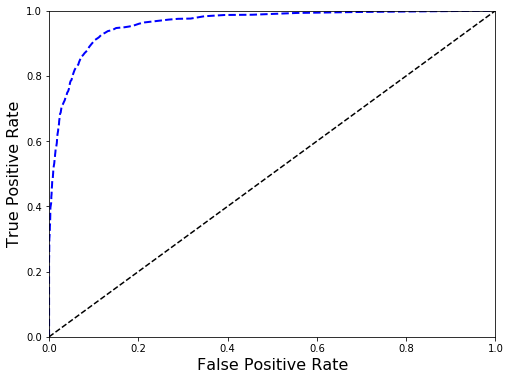

In [15]:
fpr,tpr,thresholds=roc_curve(yTest,y0TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()


In [16]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(xTrain.columns, clf0.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance',inplace= True, ascending = False)
importances

,Gini-importance
z,0.193867
x,0.145573
E,0.124762
RatioNext2NHits,0.070570
RatioNextNHits,0.052380
RatioE,0.051947
y,0.051354
RatioSiblingE,0.048564
RatioSiblingNHits,0.045790
RatioNext2E,0.036327


Optimal number of features : 9


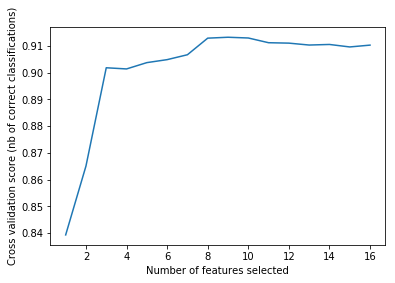

In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier(max_depth=40,n_estimators=100,random_state=1234)

X=clean_df.drop(['purity','event','trackster'],1,inplace=False)
y=clean_df[['purity']].iloc[:,0]

#use f1
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='f1')
rfecv.fit(X, y)

print("f1 scoring - Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("f1 scoring - Number of features selected")
plt.ylabel("f1 scoring - Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()



In [18]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, ranking in zip(X.columns, rfecv.ranking_):
    feats[feature] = ranking 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'RFECV Ranking'})
importances.sort_values(by='RFECV Ranking',inplace= True, ascending = True)
importances

,RFECV Ranking
E,1
x,1
y,1
z,1
RatioSiblingNHits,1
RatioNextNHits,1
RatioE,1
RatioSiblingE,1
RatioNext2NHits,1
RatioNextE,2


In [19]:
#featuer selection using CHi-squard
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Feature extraction

test = SelectKBest(score_func=f_classif, k=8)
fit = test.fit(X, y)
feats = {} 
for feature, ranking in zip(X.columns, fit.scores_):
    feats[feature] = ranking 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'f_classif Ranking'})
importances.sort_values(by='f_classif Ranking',inplace= True, ascending = False)
importances

,f_classif Ranking
z,12232.799200
RatioSiblingE,8933.355503
RatioSiblingNHits,8145.684293
x,7730.595763
E,4959.027022
nHits,4906.621172
RatioNext2NHits,2362.866629
RatioNextNHits,2029.115004
RatioE,1682.389427
RatioPrevE,839.116064


In [21]:
clf2 = MLPClassifier(alpha=0.05, hidden_layer_sizes=(16, 16, 16), random_state=1234).fit(xTrain_sc, yTrain)
y2TestPred = clf2.predict(xTest_sc) 
y2TestPredProba = clf2.predict_proba(xTest_sc)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y2TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y2TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y2TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y2TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y2TestPred))

Testing confusion_matrix
[[5002  178]
 [ 315  960]]
Test accuracy
0.9236250968241673
Test Percision
0.843585237258348
Test recall
0.7529411764705882
Test F1 score
0.7956900124326565


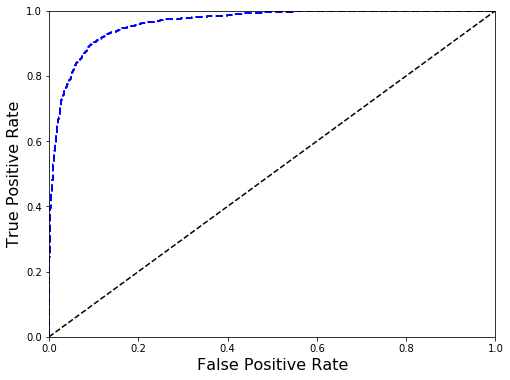

In [22]:
fpr,tpr,thresholds=roc_curve(yTest,y2TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [23]:
clf3 = SVC(C=5,kernel='rbf', gamma=1, probability=True).fit(xTrain_sc, yTrain)
y3TestPred = clf3.predict(xTest_sc) 
y3TestPredProba = clf3.predict_proba(xTest_sc)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y3TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y3TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y3TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y3TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y3TestPred))

Testing confusion_matrix
[[4868  312]
 [ 323  952]]
Test accuracy
0.9016266460108443
Test Percision
0.7531645569620253
Test recall
0.7466666666666667
Test F1 score
0.7499015360378102


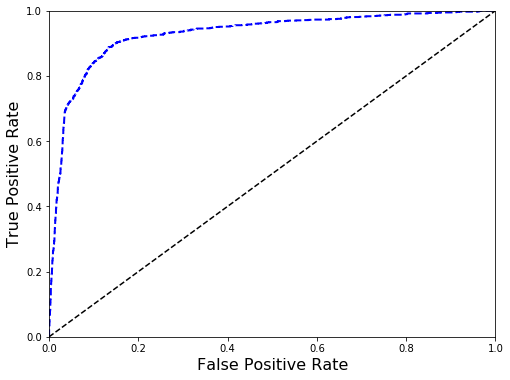

In [24]:
fpr,tpr,thresholds=roc_curve(yTest,y3TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [25]:
clf4 = XGBClassifier(max_depth=50,random_state=1234).fit(xTrain_sc, yTrain)
y4TestPred = clf4.predict(xTest_sc) 
y4TestPredProba = clf4.predict_proba(xTest_sc)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, y4TestPred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, y4TestPred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, y4TestPred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, y4TestPred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, y4TestPred))

Testing confusion_matrix
[[4999  181]
 [ 247 1028]]
Test accuracy
0.9336948102246321
Test Percision
0.8502894954507858
Test recall
0.8062745098039216
Test F1 score
0.8276972624798712


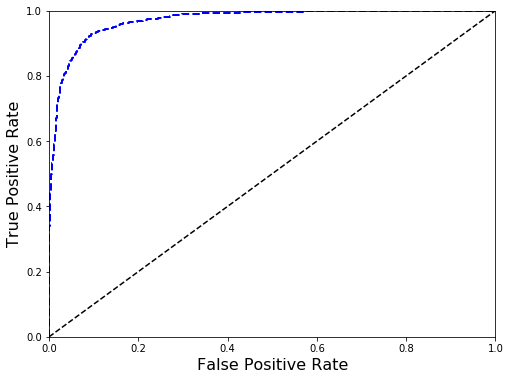

In [26]:
fpr,tpr,thresholds=roc_curve(yTest,y4TestPredProba[:,1])
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

# Crossvalidation of the 4 models
### Remove correlated and low-importance features

In [27]:
clean_df = updated_df.drop(['eta','phi','layer','trckPhi','trckEn','trckEta','trckType'],1,inplace=False)
clean_df = clean_df.drop(['event','trackster','RatioPrev2NHits','RatioNext2NHits','RatioPrev2E','RatioNext2E'],1,inplace=False)

clean_df['purity']=clean_df['purity'].apply(lambda x: 0 if x <=1 else 1 )

X=clean_df.drop(['purity'],1,inplace=False)
X_sc = sc.fit_transform(X)
y=clean_df[['purity']].iloc[:,0]


f1 scoring - Optimal number of features : 9


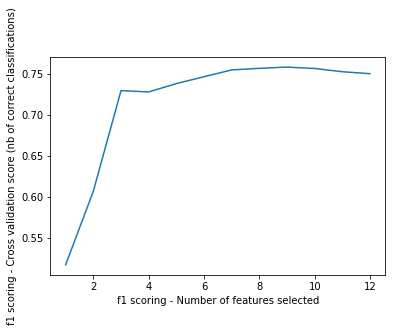

,RFECV Ranking
E,1
x,1
y,1
z,1
RatioSiblingNHits,1
RatioNextNHits,1
RatioE,1
RatioSiblingE,1
RatioNextE,1
RatioPrevE,2


In [28]:
#use f1
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='f1')
rfecv.fit(X, y)

print("f1 scoring - Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("f1 scoring - Number of features selected")
plt.ylabel("f1 scoring - Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feats = {} # a dict to hold feature_name: feature_importance
for feature, ranking in zip(X.columns, rfecv.ranking_):
    feats[feature] = ranking 
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'RFECV Ranking'})
importances.sort_values(by='RFECV Ranking',inplace= True, ascending = True)
importances


In [30]:
clean_df = clean_df.drop(['nHits','RatioPrevNHits'],1,inplace=False)
X=clean_df.drop(['purity'],1,inplace=False)
X_sc = sc.fit_transform(X)
y=clean_df[['purity']].iloc[:,0]

In [31]:
models = [clf0, clf2, clf3, clf4]
names = ["RandomForest", "MLPClassifier", "SVC", "XGBClassifier"]
scoring = {'accuracy': 'accuracy','f1': 'f1'}

for model, name in zip(models, names):
    print (name)
    cv_results=cross_validate(model, X_sc, y, scoring=scoring, cv=5, return_train_score=True)
    print("test_accuracy", cv_results['test_accuracy'])
    print("test_f1", cv_results['test_f1'])
    print("----------------------------------------------")

RandomForest
test_accuracy [0.89141884 0.92501936 0.90395043 0.92640223 0.91788038]
test_f1 [0.67680959 0.81225756 0.7234612  0.80961924 0.76381462]
----------------------------------------------
MLPClassifier
test_accuracy [0.89575589 0.92904725 0.91773819 0.92314844 0.92221878]
test_f1 [0.70128717 0.82465544 0.76284055 0.80804954 0.79065888]
----------------------------------------------
SVC
test_accuracy [0.88770136 0.91169636 0.90240124 0.9175705  0.9132321 ]
test_f1 [0.67934542 0.78227655 0.72440945 0.79234973 0.76954733]
----------------------------------------------
XGBClassifier
test_accuracy [0.89622057 0.92161115 0.9070488  0.927022   0.92020452]
test_f1 [0.68981481 0.80818802 0.74293059 0.81608747 0.78187209]
----------------------------------------------


## stacking of the 3 models with a meta-model

In [32]:
from vecstack import stacking
Stacking_train, Stacking_test = stacking(models,                     # list of models
                           xTrain_sc, yTrain, xTest_sc,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and vote
                           needs_proba=False,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=accuracy_score,      # metric: callable
                           n_folds=5,                  # number of folds
                           random_state=1234)           # ensure reproducibility          

C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
# Initialize 2nd level model
metaModel_XGB = XGBClassifier(max_depth=25,random_state=1234, n_estimators=100)

# Fit 2nd level model
clf_meta_xgb = metaModel_XGB.fit(Stacking_train, yTrain)

# Predict
Stacking_y_pred = clf_meta_xgb.predict(Stacking_test)

print("Testing confusion_matrix")
print(confusion_matrix(yTest, Stacking_y_pred))

print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, Stacking_y_pred))
print("Test Percision")
print(sklearn.metrics.precision_score(yTest, Stacking_y_pred))
print("Test recall")
print(sklearn.metrics.recall_score(yTest, Stacking_y_pred))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, Stacking_y_pred))

Testing confusion_matrix
[[5007  173]
 [ 255 1020]]
Test accuracy
0.9336948102246321
Test Percision
0.8549874266554903
Test recall
0.8
Test F1 score
0.826580226904376


## ANN model using Keras

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

Using TensorFlow backend.


In [37]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=xTrain_sc.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])
    return model

In [40]:
model = baseline_model()
model.fit(xTrain_sc, yTrain, nb_epoch=300,batch_size=32,verbose=1)

C:\Users\20184731\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/300
25819/25819 [==============================] - 1s 34us/step - loss: 0.2553 - sparse_categorical_accuracy: 0.8966
Epoch 2/300
25819/25819 [==============================] - 1s 30us/step - loss: 0.2148 - sparse_categorical_accuracy: 0.9118
Epoch 3/300
25819/25819 [==============================] - 1s 30us/step - loss: 0.2068 - sparse_categorical_accuracy: 0.9127
Epoch 4/300
25819/25819 [==============================] - 1s 31us/step - loss: 0.2004 - sparse_categorical_accuracy: 0.9160
Epoch 5/300
25819/25819 [==============================] - 1s 31us/step - loss: 0.1967 - sparse_categorical_accuracy: 0.9163
Epoch 6/300
25819/25819 [==============================] - 1s 32us/step - loss: 0.1935 - sparse_categorical_accuracy: 0.9191
Epoch 7/300
25819/25819 [==============================] - 1s 32us/step - loss: 0.1904 - sparse_categorical_accuracy: 0.9199
Epoch 8/300
25819/25819 [==============================] - 1s 31us/step - loss: 0.1892 - sparse_categorical_accuracy: 0.9208


In [42]:
pred2=model.predict_classes(xTest_sc, batch_size=32, verbose=0)
print("Testing confusion_matrix")
print(confusion_matrix(yTest, pred2))
print("Test accuracy")
print(sklearn.metrics.accuracy_score(yTest, pred2))
print("Test F1 score")
print(sklearn.metrics.f1_score(yTest, pred2))

Testing confusion_matrix
[[4931  249]
 [ 353  922]]
Test accuracy
0.9067389620449264
Test F1 score
0.7538838920686836
